# Tutorial 2d - Raytracing Aspheres

### July 2024

This tutorial shows how even aspheres can be modeled in Optiland. We will first assess a simple spherical lens, then compare it to an even asphere.

In [1]:
import numpy as np

from optiland import analysis, optic

1. Spherical Singlet

Let's define a simple singlet:

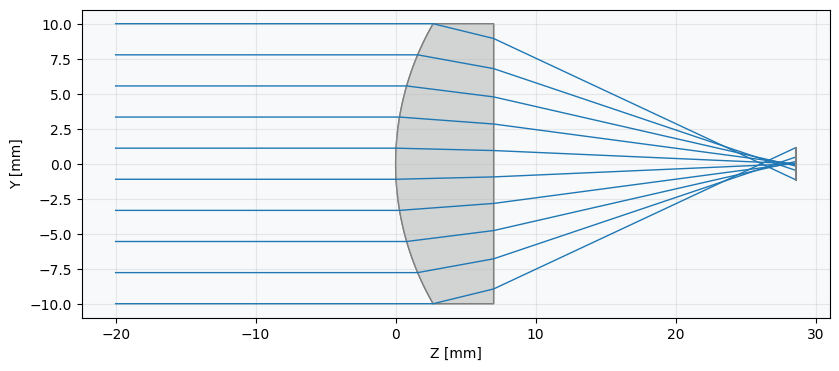

In [2]:
spherical = optic.Optic()

# add surfaces
spherical.add_surface(index=0, radius=np.inf, thickness=np.inf)
spherical.add_surface(
    index=1,
    thickness=7,
    radius=20.0,
    is_stop=True,
    material="N-SF11",
)
spherical.add_surface(index=2, thickness=21.56201105)
spherical.add_surface(index=3)

# add aperture
spherical.set_aperture(aperture_type="EPD", value=20.0)

# add field
spherical.set_field_type(field_type="angle")
spherical.add_field(y=0)

# add wavelength
spherical.add_wavelength(value=0.587, is_primary=True)

spherical.update_paraxial()

spherical.draw(num_rays=10)

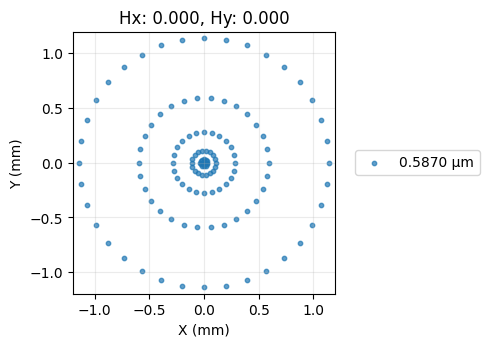

In [3]:
spot = analysis.SpotDiagram(spherical)
spot.view()

As we can see, this lens shows a significant amount of spherical aberration, as is typical for such a lens.

2. Aspherical Singlet

Let's now define an asphere which has improved spherical aberration performance.

We define the "surface_type" attribute as "even_asphere" and we supply a list of coefficients of the aspheric terms. The aspheric surface sag equation is

$z(r) = \frac{r^2}{R(1 + \sqrt{1 - (1 + \kappa)\frac{r^2}{R^2}})} + \alpha_2r^2 + \alpha_4r^4 + \alpha_6r^6 + \ldots$

where $z$ is the sag, $R$ is the radius of curvature, $r$ is the radial distance from the optical axis, and $\alpha_2, \alpha_4, \alpha_6, \ldots$ are the coefficients of the asphere. The coefficient list provided to the surface is simply $[\alpha_2, \alpha_4, \alpha_6, \ldots]$.

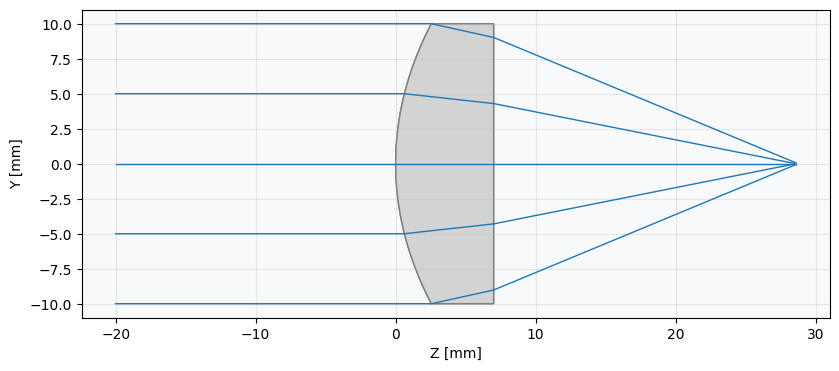

In [ ]:
asphere = optic.Optic()

# add surfaces
asphere.add_surface(index=0, radius=np.inf, thickness=np.inf)
asphere.add_surface(
    index=1,
    thickness=7,
    radius=20.0,
    is_stop=True,
    material="N-SF11",
    surface_type="even_asphere",
    conic=0.0,
    coefficients=[
        -2.248851e-4,
        -4.690412e-6,
        -6.404376e-8,
    ],  # <-- coefficients for asphere
)
asphere.add_surface(index=2, thickness=21.56201105)
asphere.add_surface(index=3)

# add aperture
asphere.set_aperture(aperture_type="EPD", value=20.0)

# add field
asphere.set_field_type(field_type="angle")
asphere.add_field(y=0)

# add wavelength
asphere.add_wavelength(value=0.587, is_primary=True)

asphere.update_paraxial()

asphere.draw(num_rays=5)

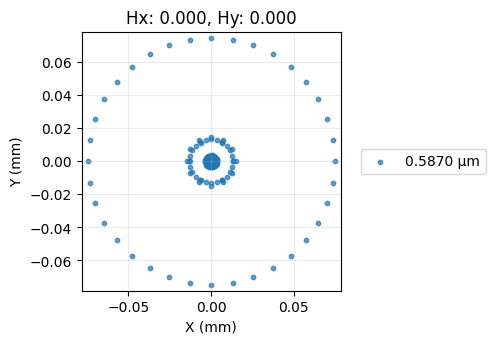

In [5]:
spot = analysis.SpotDiagram(asphere)
spot.view()

We can see that the rays now focus much closer to the optical axis and that the spot size has reduced significantly.

Conclusions:

- This tutorial introduced the even asphere surface type.
- To use an aspheric surface, we simply specify surface_type='even_asphere' and provide the list of aspheric coefficients.

This tutorial used an asphere that had alredy been optimized for minimal wavefront error. We ignored these details here, but future tutorials will elaborate on the asphere optimization process.